In [1]:
import matplotlib.pyplot as plt
import numpy as np
import linmix
np.random.seed(2)

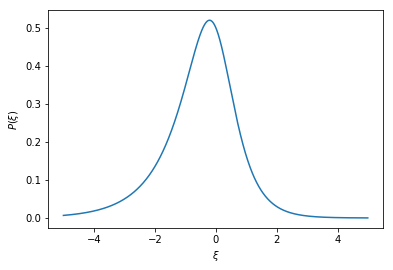

In [2]:
def pxi(xi):
    return np.exp(xi) * (1.0 + np.exp(2.75*xi))**(-1)
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(-5,5, 0.01)
ax.plot(x, pxi(x))
ax.set_xlabel(r"$\xi$")
ax.set_ylabel(r"$P(\xi)$")
plt.show()

The maximum density is a little below 0.55, so we can use that.  To draw samples from
$\mathrm{Pr}(\xi)$, we first propose a value $\xi_i$ uniformly between -10 and +10
(it's okay if we clip the tails for this example), and then keep that proposal if
$\mathrm{Pr}(\xi_i) > u$ where $u$ is drawn uniformly between 0 and 0.55.  If
$\mathrm{Pr}(\xi_i) < u$, then we propose a new value for $\xi_i$.  Here's code to
draw 100 samples from $\mathrm{Pr}(\xi)$::

In [3]:
def rejection_sample(p, pmax, prop, size):
    out=[]
    for s in range(size):
        x = prop()
        px = p(x)
        pu = np.random.uniform(low=0.0, high=pmax)
        while px < pu:
            x = prop()
            px = p(x)
            pu = np.random.uniform(low=0.0, high=pmax)
        out.append(x)
    return np.array(out)
pmax = 0.55 # max p(xi) determined by eye
prop = lambda : np.random.uniform(low=-10, high=10) # truncating range to (-10, 10)
xi = rejection_sample(pxi, pmax, prop, size=100)
